In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print(fruits.shape)

(59, 7)


In [4]:
#type of fruits we have
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [5]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


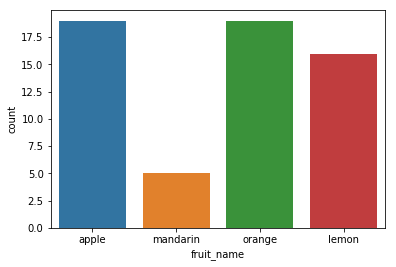

In [6]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="count")
plt.show()

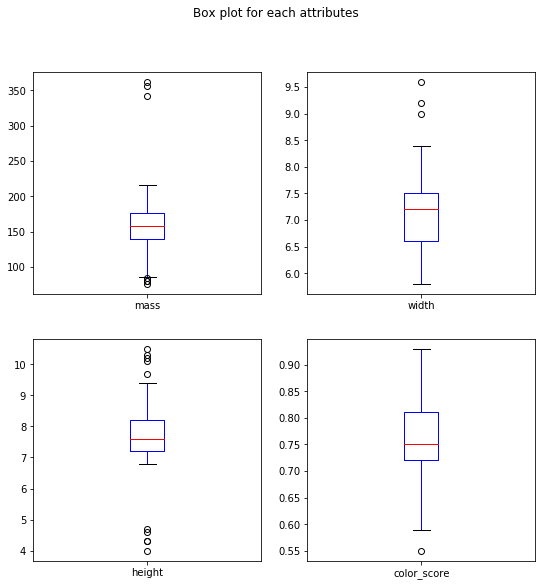

In [7]:
#box plot of each variables[attributes]

fruits.drop('fruit_label',axis=1).plot(kind='box', subplots=True,layout=(2,2),sharex=False,sharey=False,figsize=(9,9),
                                      title="Box plot for each attributes")
plt.savefig('fruits_box')
plt.show()

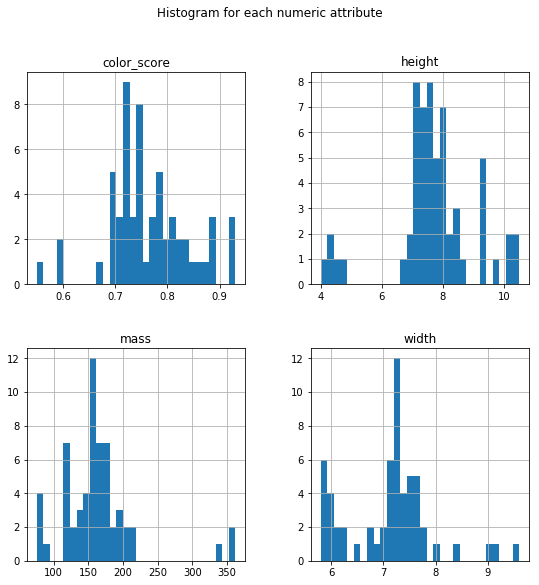

In [8]:
#its look like color_score have a near gaussian distribution ,(???)

import pylab as pl
fruits.drop('fruit_label',axis=1).hist(bins=30,figsize=(9,9))
pl.suptitle("Histogram for each numeric attribute")
plt.savefig('fruits_hist')
plt.show()

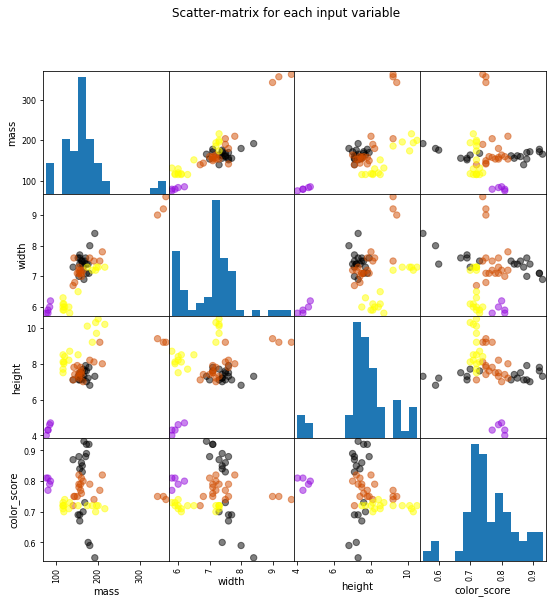

In [9]:
#Some pairs of attributes are correlated (mass and width). 
#This suggests a high correlation and a predictable relationship.
from matplotlib import cm

feature_names=['mass','width','height','color_score']
X=fruits[feature_names]
y=fruits['fruit_label']

cmap=cm.get_cmap('gnuplot')

scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [10]:
#create a training set and apply summary

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#scale values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [11]:
#Build MOodels

#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

print("accuracy of logistic regression on training set:{:.2f}".format(logreg.score(X_train,y_train)))
print("accuracy of logistic regression on the test set:{:.2f}".format(logreg.score(X_test,y_test)))



accuracy of logistic regression on training set:0.70
accuracy of logistic regression on the test set:0.40


/home/naveen/venv/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/naveen/venv/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
#k-nn classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

print("accuracy of knn classifer on training set{:.2f}".format(knn.score(X_train,y_train)))
print("accuracy of knn classifer on test set{:.2f}".format(knn.score(X_test,y_test)))

#when the n_neighbors=1, there is a large difference between train, and test accuracies(1 and 0.87)
#must be overfitting

#when n_neighbors=3, training_set_accuracy=0.95, test_set=0.93

accuracy of knn classifer on training set0.95
accuracy of knn classifer on test set0.93


In [13]:
#Try using decision tree

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier().fit(X_train,y_train)
print("accuracy of DecisionTreeClassifier on training set:{:.2f}".format(clf.score(X_train,y_train)))
print("accuracy of DecisionTreeClassifier on test set:{:.2f}".format(clf.score(X_test,y_test)))

accuracy of DecisionTreeClassifier on training set:1.00
accuracy of DecisionTreeClassifier on test set:0.73


In [15]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train)
print("Training Accuracy fo gaussian naive_bayes:{:.2f}".format(gnb.score(X_train,y_train)))
print("Test set Accuracy of gaussian naive bayes:{:.2f}".format(gnb.score(X_test,y_test)))

Training Accuracy fo gaussian naive_bayes:0.86
Test set Accuracy of gaussian naive bayes:0.67
